In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_lebels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

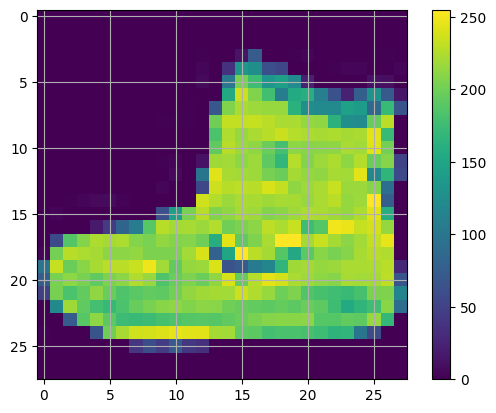

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [17]:
train_images = train_images/255.0

test_images = test_images/255.0

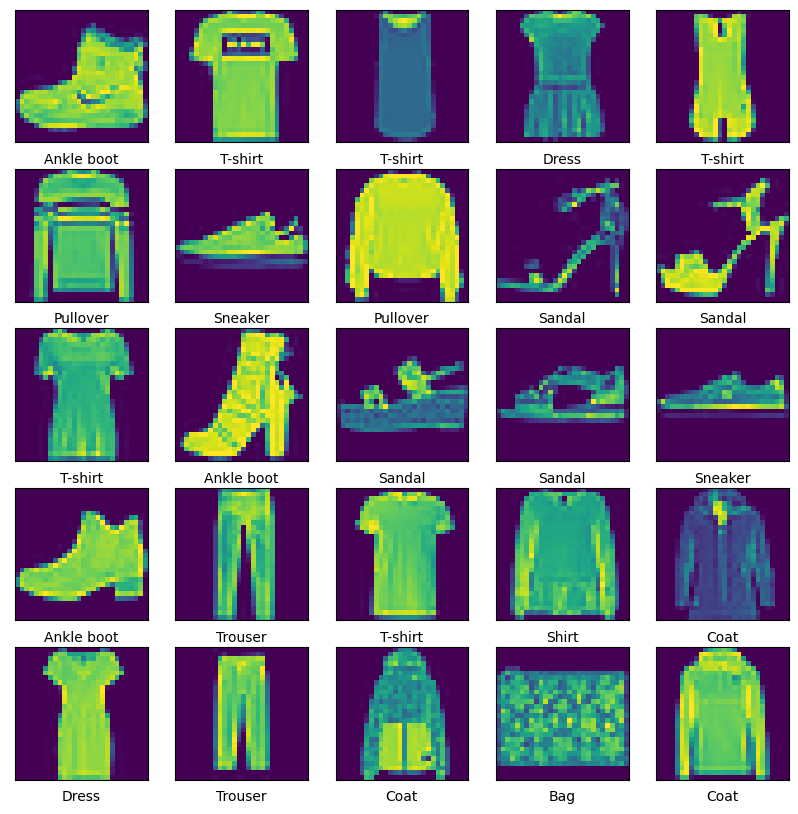

In [26]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [33]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8242
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8659
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3349 - accuracy: 0.8790
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8855
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2946 - accuracy: 0.8915
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.8954
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9011
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9042
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9075
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [36]:
test_loss, test_acc = model.evaluate(test_images,test_lebels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 0s - loss: 0.7563 - accuracy: 0.8872 - 396ms/epoch - 1ms/step

Test accuracy: 0.8871999979019165


In [38]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 886us/step


In [41]:
predictions[0]

array([1.97130042e-27, 8.35005124e-32, 2.85670372e-28, 6.50235280e-33,
       1.86444407e-30, 1.74114109e-11, 4.31248802e-27, 1.32710405e-11,
       5.30331663e-20, 1.00000000e+00], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [44]:
test_lebels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

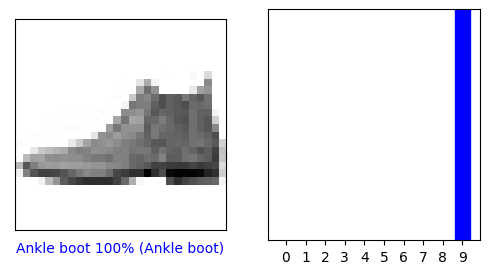

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lebels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lebels)
plt.show()

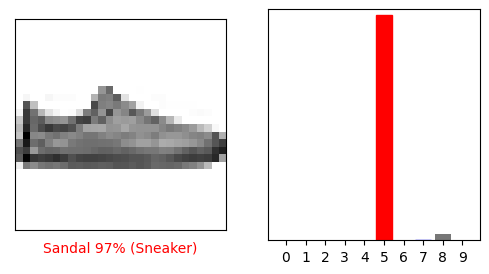

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lebels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lebels)
plt.show()

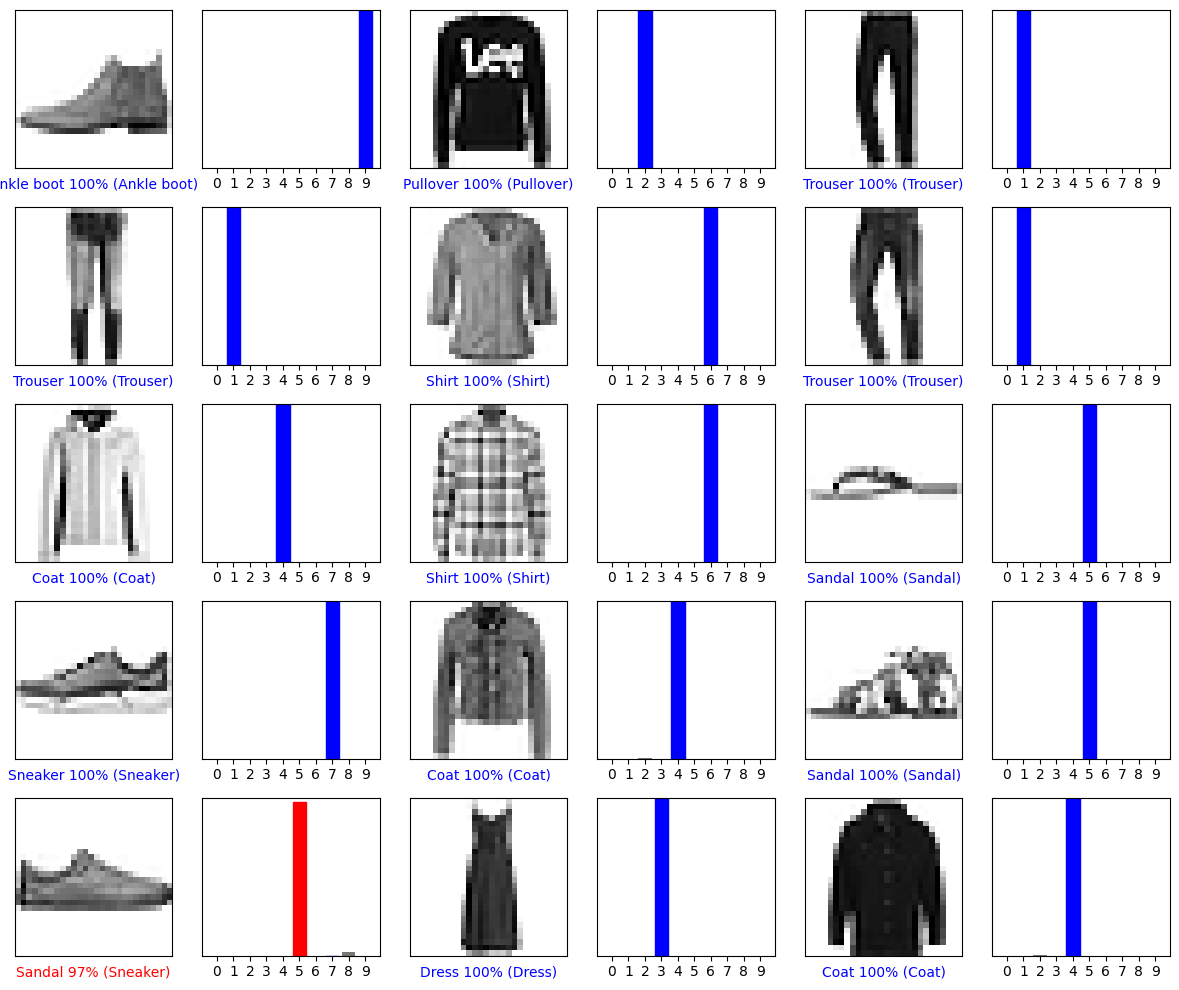

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_lebels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_lebels)
plt.tight_layout()
plt.show()

In [ ]:
img = 